# Data Visualization of Parameter Estimates

This notebook explores how `Estimate_Value` varies based on `Latent_Variable`, `Model_Structure`, and `Platform`.

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
param_results = pd.read_csv("/Users/hyunwoo/Desktop/0327_PADA/param_results.csv")
fit_results = pd.read_csv("/Users/hyunwoo/Desktop/0327_PADA/fit_results.csv")

# Rename Columns
param_results.rename(columns={"Latent": "Latent_Variable", "Structure": "Model_Structure", "platform": "Platform", "Estimate": "Estimate_Value"}, inplace=True)
fit_results.rename(columns={"Latent": "Latent_Variable", "Structure": "Model_Structure", "platform": "Platform"}, inplace=True)

# Display first few rows
param_results.head(), fit_results.head()


(  Latent_Variable                       Model_Structure Platform  \
 0       Valence O  Helpfulness ~ Heuristic + Systematic    hotel   
 1       Valence O  Helpfulness ~ Heuristic + Systematic    hotel   
 2       Valence O  Helpfulness ~ Heuristic + Systematic    hotel   
 3       Valence O  Helpfulness ~ Heuristic + Systematic    hotel   
 4       Valence O  Helpfulness ~ Heuristic + Systematic    hotel   
 
                         lval op        rval  Estimate_Value  \
 0               Title_Length  ~   Heuristic        1.000000   
 1                Text_Length  ~   Heuristic        5.771990   
 2  Deviation_Of_Star_Ratings  ~   Heuristic        0.766759   
 3                   Is_Photo  ~   Heuristic        0.636633   
 4        Flesch_Reading_Ease  ~  Systematic        1.000000   
 
              Std. Error             z-value p-value  
 0                     -                   -       -  
 1   0.17469083887614295   33.04117285864066     0.0  
 2  0.024042472362602218  31.8918

## Boxplot: Estimate Distribution by Platform & Latent Variable

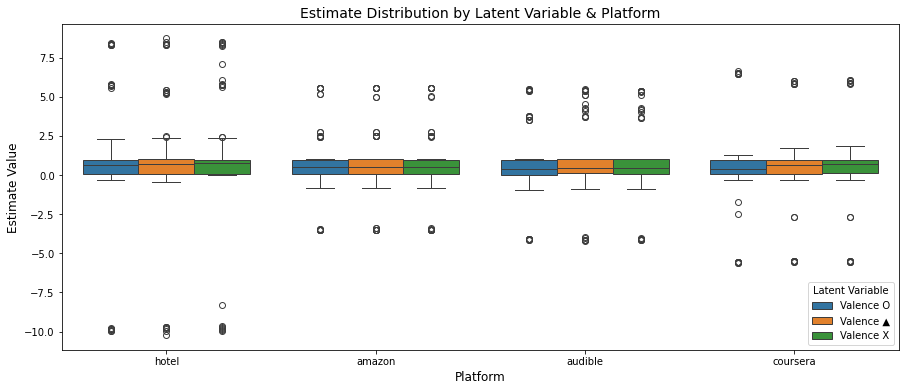

In [9]:

plt.figure(figsize=(15, 6))
sns.boxplot(data=param_results, x="Platform", y="Estimate_Value", hue="Latent_Variable")
plt.title("Estimate Distribution by Latent Variable & Platform", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Estimate Value", fontsize=12)
plt.legend(title="Latent Variable")
plt.show()


## Barplot: Mean Estimate Value by Model Structure & Latent Variable

<ipython-input-10-0f6dd1df54fd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=param_results, x="Model_Structure", y="Estimate_Value", hue="Latent_Variable", ci=None)


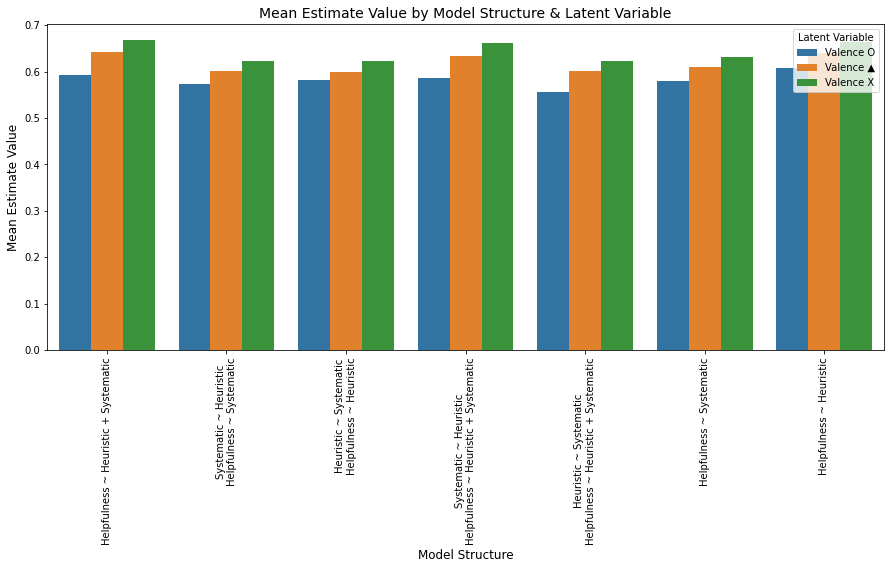

In [10]:

plt.figure(figsize=(15, 6))
sns.barplot(data=param_results, x="Model_Structure", y="Estimate_Value", hue="Latent_Variable", ci=None)
plt.xticks(rotation=90)
plt.title("Mean Estimate Value by Model Structure & Latent Variable", fontsize=14)
plt.xlabel("Model Structure", fontsize=12)
plt.ylabel("Mean Estimate Value", fontsize=12)
plt.legend(title="Latent Variable")
plt.show()


## Scatterplot: Estimate Value vs. Standard Error by Platform

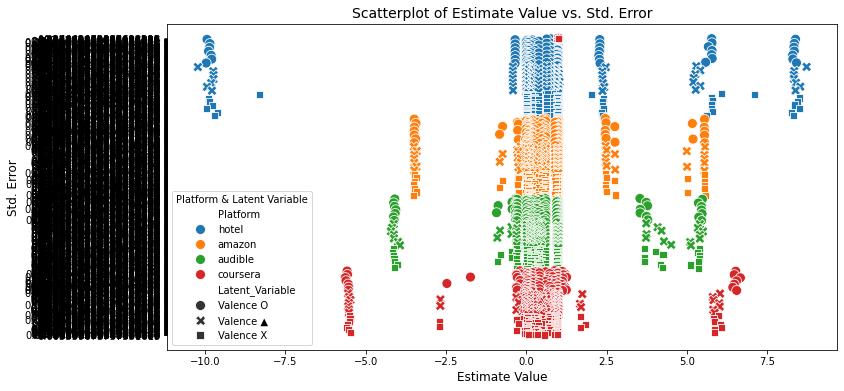

In [11]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=param_results, x="Estimate_Value", y="Std. Error", hue="Platform", style="Latent_Variable", s=100)
plt.title("Scatterplot of Estimate Value vs. Std. Error", fontsize=14)
plt.xlabel("Estimate Value", fontsize=12)
plt.ylabel("Std. Error", fontsize=12)
plt.legend(title="Platform & Latent Variable")
plt.show()


<ipython-input-13-7c68aa280845>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fit_results_long, x="Metric", y="Value", hue="Model_Structure", ci=None)


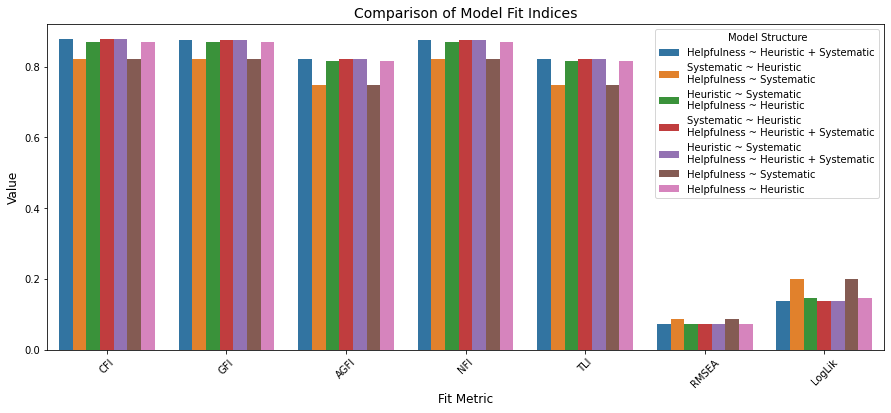

In [13]:
# 적합도 지표 비교 (CFI, GFI, AGFI, NFI, TLI, RMSEA, AIC, BIC, LogLik)
fit_metrics = ["CFI", "GFI", "AGFI", "NFI", "TLI", "RMSEA", "LogLik"]

plt.figure(figsize=(15, 6))
fit_results_long = fit_results.melt(id_vars=["Model_Structure"], value_vars=fit_metrics, var_name="Metric", value_name="Value")
sns.barplot(data=fit_results_long, x="Metric", y="Value", hue="Model_Structure", ci=None)
plt.xticks(rotation=45)
plt.title("Comparison of Model Fit Indices", fontsize=14)
plt.xlabel("Fit Metric", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Model Structure")
plt.show()

<ipython-input-14-69dc282b3873>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fit_results_long, x="Metric", y="Value", hue="Platform", ci=None)


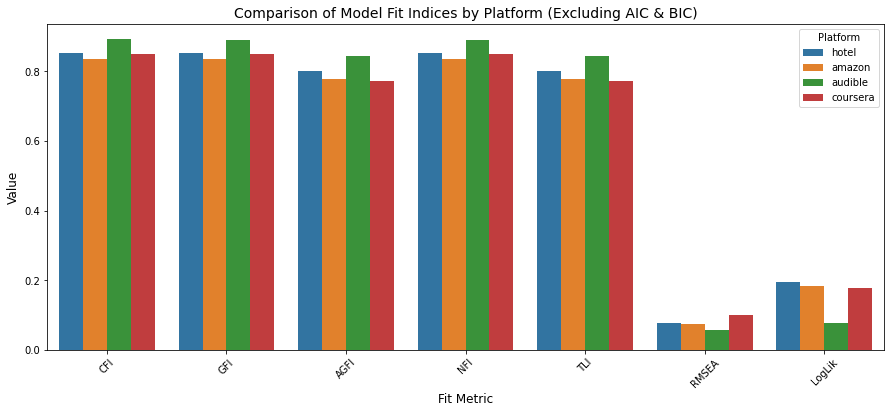

In [14]:
# AIC, BIC 제외한 적합도 지표 비교 (플랫폼별)
fit_metrics_filtered = ["CFI", "GFI", "AGFI", "NFI", "TLI", "RMSEA", "LogLik"]

plt.figure(figsize=(15, 6))
fit_results_long = fit_results.melt(id_vars=["Platform"], value_vars=fit_metrics_filtered, var_name="Metric", value_name="Value")
sns.barplot(data=fit_results_long, x="Metric", y="Value", hue="Platform", ci=None)
plt.xticks(rotation=45)
plt.title("Comparison of Model Fit Indices by Platform (Excluding AIC & BIC)", fontsize=14)
plt.xlabel("Fit Metric", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Platform")
plt.show()